Importing the Dataset from Kaggle



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("somesh24/spambase")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spambase


Importing the necessary libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

# Classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Load the Dataset.

In [ ]:
csv_path = os.path.join(path, "spambase_csv.csv")

# Load the dataset
df = pd.read_csv(csv_path)

# Preview
print(df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

Preprocess the Data

In [ ]:
X = df.iloc[:, :-1]  # features
y = df.iloc[:, -1]   # labels: 1 for spam, 0 for ham

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Features

In [ ]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


Labels [1 for spam and 0 for ham]

In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


Exploratory Data Analysis

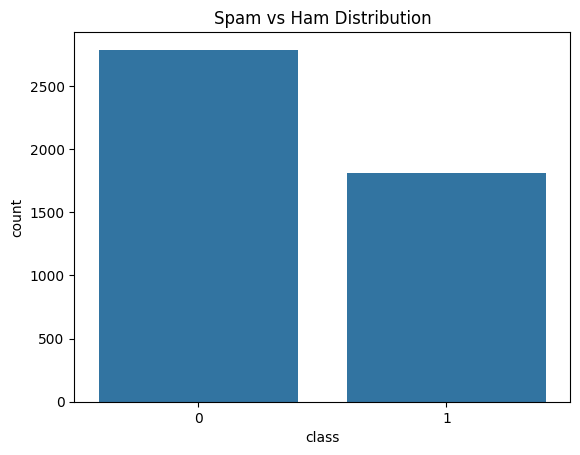

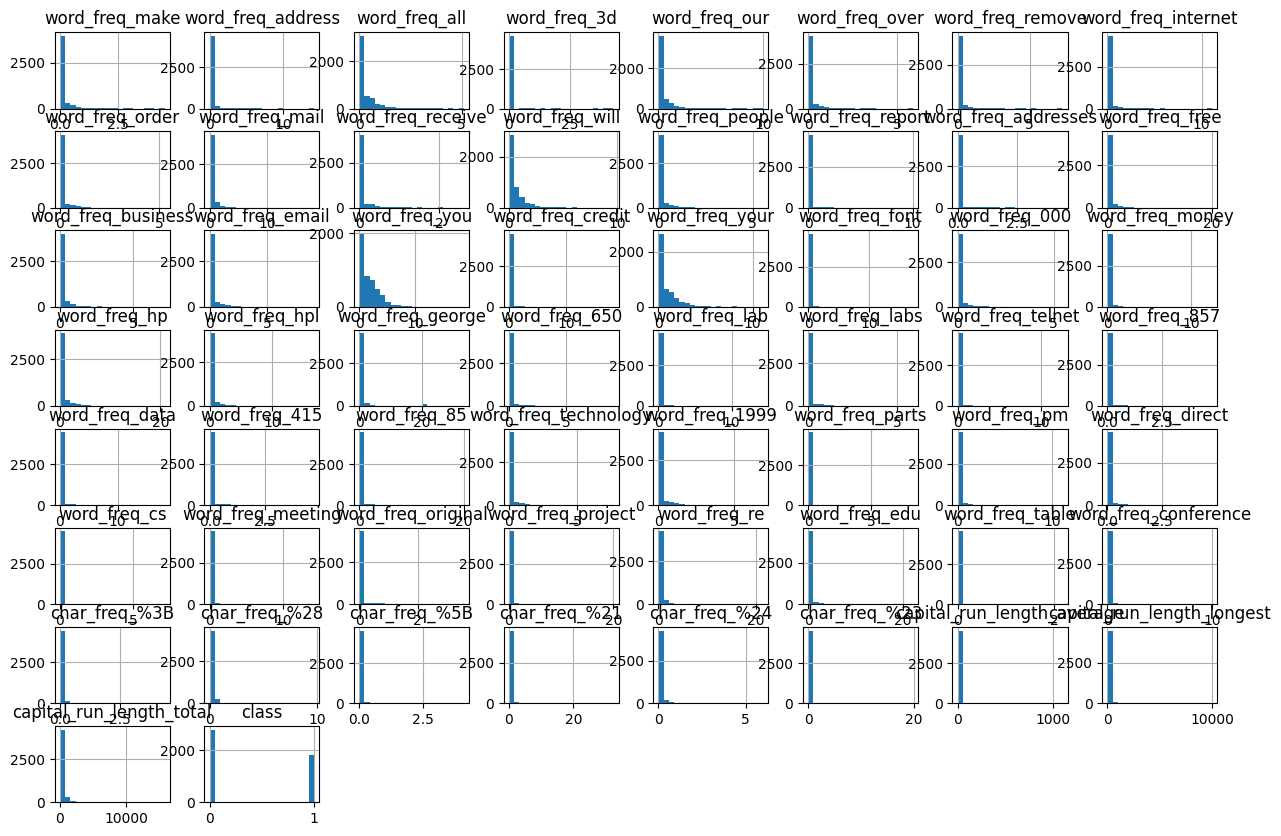

In [ ]:
# Class balance
sns.countplot(x=y)
plt.title("Spam vs Ham Distribution")
plt.show()

# Feature distributions (optional)
df.hist(figsize=(15, 10), bins=20)
plt.show()

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

Train the naive bayes model

In [ ]:
nb_models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB()
}

nb_results = []
for name, model in nb_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    nb_results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

In [ ]:
nb_results_df = pd.DataFrame(nb_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
display(nb_results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,GaussianNB,0.832790,0.714579,0.958678,0.818824
1,BernoulliNB,0.901194,0.902367,0.840220,0.870185


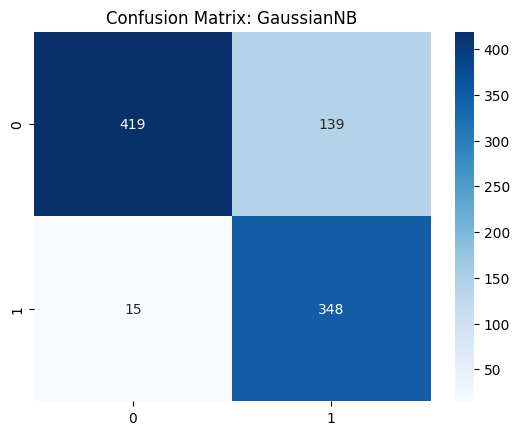

In [ ]:
# Confusion matrix for one model (e.g., GaussianNB)
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: GaussianNB")
plt.show()


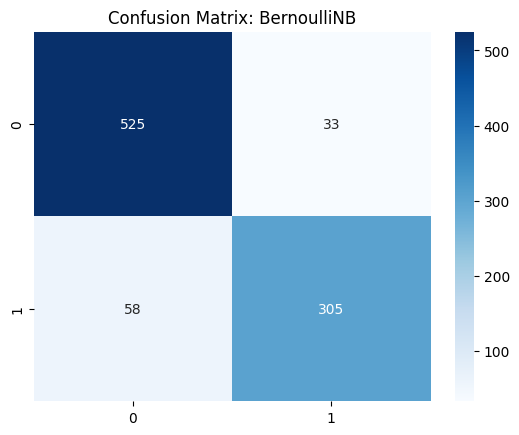

In [ ]:
# Confusion matrix for one model (e.g., GaussianNB)
model = BernoulliNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: BernoulliNB")
plt.show()


ROC curve

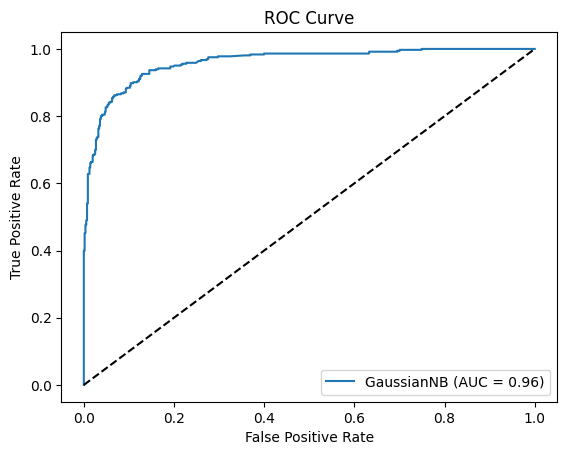

In [ ]:
# ROC Curve example
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.plot(fpr, tpr, label="GaussianNB (AUC = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Now let's create some new test data and see how the trained Bernoulli Naive Bayes model classifies it.

In [ ]:
# Create new test data (replace with your own data)
# This should have the same number of features (57) as the training data
new_test_data = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

# Scale the new test data using the same scaler
new_test_data_scaled = scaler.transform(new_test_data)

# Get the best performing model (BernoulliNB)
best_model = nb_models["BernoulliNB"]

# Predict the class of the new data
prediction = best_model.predict(new_test_data_scaled)

if prediction[0] == 1:
    print("The new data is classified as Spam.")
else:
    print("The new data is classified as Ham.")

The new data is classified as Ham.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Train the K-Nearest Neighbour model

In [ ]:
# Implement KNN with different algorithms and varying k
k_values = [1, 3, 5, 7] # Example k values

knn_models = {}
for k in k_values:
    knn_models[f"K-Nearest Neighbors (k={k}, auto)"] = KNeighborsClassifier(n_neighbors=k)
    knn_models[f"K-Nearest Neighbors (k={k}, kd_tree)"] = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn_models[f"K-Nearest Neighbors (k={k}, ball_tree)"] = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')


knn_results = []
for name, model in knn_models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    knn_results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

# Display the results
knn_results_df = pd.DataFrame(knn_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
display(knn_results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,"K-Nearest Neighbors (k=1, auto)",0.897937,0.876751,0.862259,0.869444
1,"K-Nearest Neighbors (k=1, kd_tree)",0.897937,0.876751,0.862259,0.869444
2,"K-Nearest Neighbors (k=1, ball_tree)",0.897937,0.876751,0.862259,0.869444
3,"K-Nearest Neighbors (k=3, auto)",0.901194,0.882022,0.865014,0.873435
4,"K-Nearest Neighbors (k=3, kd_tree)",0.901194,0.882022,0.865014,0.873435
5,"K-Nearest Neighbors (k=3, ball_tree)",0.901194,0.882022,0.865014,0.873435
6,"K-Nearest Neighbors (k=5, auto)",0.905537,0.887640,0.870523,0.878999
7,"K-Nearest Neighbors (k=5, kd_tree)",0.905537,0.887640,0.870523,0.878999
8,"K-Nearest Neighbors (k=5, ball_tree)",0.905537,0.887640,0.870523,0.878999
9,"K-Nearest Neighbors (k=7, auto)",0.907709,0.894886,0.867769,0.881119


In [ ]:
# Create a DataFrame for KNN results
knn_results_df = pd.DataFrame(knn_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Combine the results DataFrames
all_results_df = pd.concat([nb_results_df, knn_results_df], ignore_index=True)

# Display the combined results
display(all_results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,GaussianNB,0.832790,0.714579,0.958678,0.818824
1,BernoulliNB,0.901194,0.902367,0.840220,0.870185
2,"K-Nearest Neighbors (k=1, auto)",0.897937,0.876751,0.862259,0.869444
3,"K-Nearest Neighbors (k=1, kd_tree)",0.897937,0.876751,0.862259,0.869444
4,"K-Nearest Neighbors (k=1, ball_tree)",0.897937,0.876751,0.862259,0.869444
5,"K-Nearest Neighbors (k=3, auto)",0.901194,0.882022,0.865014,0.873435
6,"K-Nearest Neighbors (k=3, kd_tree)",0.901194,0.882022,0.865014,0.873435
7,"K-Nearest Neighbors (k=3, ball_tree)",0.901194,0.882022,0.865014,0.873435
8,"K-Nearest Neighbors (k=5, auto)",0.905537,0.887640,0.870523,0.878999
9,"K-Nearest Neighbors (k=5, kd_tree)",0.905537,0.887640,0.870523,0.878999


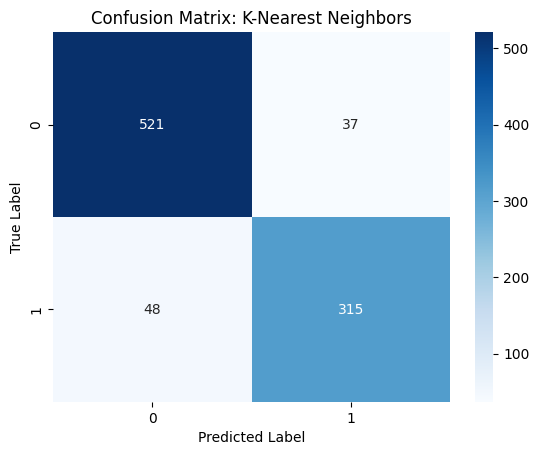

In [ ]:
# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: K-Nearest Neighbors")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

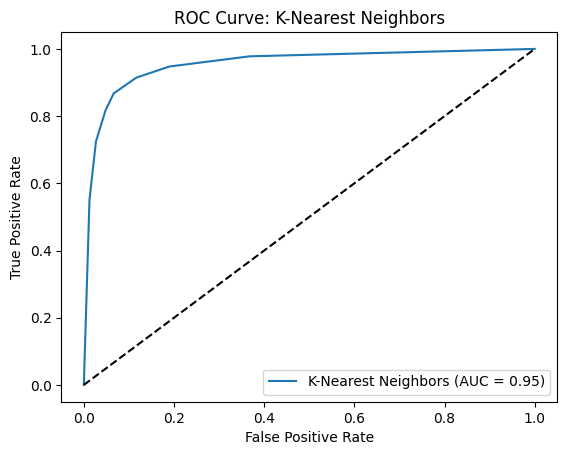

In [ ]:
# ROC Curve for KNN
# Using the last trained KNN model from the loop in cell 7281f84e
model = list(knn_models.values())[-1]
model.fit(X_train, y_train) # Fit the model before calculating ROC curve
y_score_knn = model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.plot(fpr_knn, tpr_knn, label="K-Nearest Neighbors (AUC = %0.2f)" % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve: K-Nearest Neighbors")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
# Implement KNN with different algorithms and varying k
k_values = [1, 3, 5, 7] # Example k values

knn_models = {}
for k in k_values:
    knn_models[f"K-Nearest Neighbors (k={k}, auto)"] = KNeighborsClassifier(n_neighbors=k)
    knn_models[f"K-Nearest Neighbors (k={k}, kd_tree)"] = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn_models[f"K-Nearest Neighbors (k={k}, ball_tree)"] = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')


knn_results = []
import time
for name, model in knn_models.items():
    # Train the model and measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    knn_results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        training_time
    ])

# Display the results
knn_results_df = pd.DataFrame(knn_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time"])
display(knn_results_df)

,Model,Accuracy,Precision,Recall,F1 Score,Training Time
0,"K-Nearest Neighbors (k=1, auto)",0.897937,0.876751,0.862259,0.869444,0.001716
1,"K-Nearest Neighbors (k=1, kd_tree)",0.897937,0.876751,0.862259,0.869444,0.019419
2,"K-Nearest Neighbors (k=1, ball_tree)",0.897937,0.876751,0.862259,0.869444,0.009774
3,"K-Nearest Neighbors (k=3, auto)",0.901194,0.882022,0.865014,0.873435,0.000733
4,"K-Nearest Neighbors (k=3, kd_tree)",0.901194,0.882022,0.865014,0.873435,0.015456
5,"K-Nearest Neighbors (k=3, ball_tree)",0.901194,0.882022,0.865014,0.873435,0.010028
6,"K-Nearest Neighbors (k=5, auto)",0.905537,0.887640,0.870523,0.878999,0.000706
7,"K-Nearest Neighbors (k=5, kd_tree)",0.905537,0.887640,0.870523,0.878999,0.015481
8,"K-Nearest Neighbors (k=5, ball_tree)",0.905537,0.887640,0.870523,0.878999,0.009860
9,"K-Nearest Neighbors (k=7, auto)",0.907709,0.894886,0.867769,0.881119,0.000721


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X = df.iloc[:, :-1]  # features
y = df.iloc[:, -1]   # labels: 1 for spam, 0 for ham

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
csv_path = os.path.join(path, "spambase_csv.csv")

# Load the dataset
df = pd.read_csv(csv_path)

# Preview
print(df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

In [ ]:
display(knn_results_df)

,Model,Accuracy,Precision,Recall,F1 Score,Training Time
0,"K-Nearest Neighbors (k=3, auto)",0.901194,0.882022,0.865014,0.873435,0.001598
1,"K-Nearest Neighbors (k=3, kd_tree)",0.901194,0.882022,0.865014,0.873435,0.015519
2,"K-Nearest Neighbors (k=3, ball_tree)",0.901194,0.882022,0.865014,0.873435,0.009778
3,"K-Nearest Neighbors (k=5, auto)",0.905537,0.887640,0.870523,0.878999,0.000736
4,"K-Nearest Neighbors (k=5, kd_tree)",0.905537,0.887640,0.870523,0.878999,0.015606
5,"K-Nearest Neighbors (k=5, ball_tree)",0.905537,0.887640,0.870523,0.878999,0.010382
6,"K-Nearest Neighbors (k=7, auto)",0.907709,0.894886,0.867769,0.881119,0.000724
7,"K-Nearest Neighbors (k=7, kd_tree)",0.907709,0.894886,0.867769,0.881119,0.015597
8,"K-Nearest Neighbors (k=7, ball_tree)",0.907709,0.894886,0.867769,0.881119,0.011786


In [ ]:
# Implement SVM with different kernels
svm_models = {
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True, random_state=42),
    "SVM (Polynomial Kernel)": SVC(kernel='poly', probability=True, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "SVM (Sigmoid Kernel)": SVC(kernel='sigmoid', probability=True, random_state=42)
}

svm_results = []
for name, model in svm_models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    svm_results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

# Display the results
svm_results_df = pd.DataFrame(svm_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
display(svm_results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear Kernel),0.930510,0.923513,0.898072,0.910615
1,SVM (Polynomial Kernel),0.779587,0.959770,0.460055,0.621974
2,SVM (RBF Kernel),0.927253,0.927746,0.884298,0.905501
3,SVM (Sigmoid Kernel),0.883822,0.853591,0.851240,0.852414


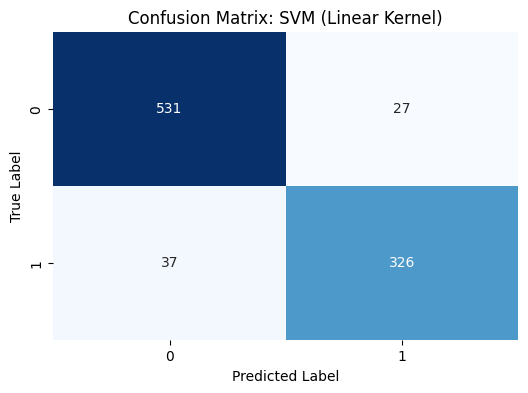

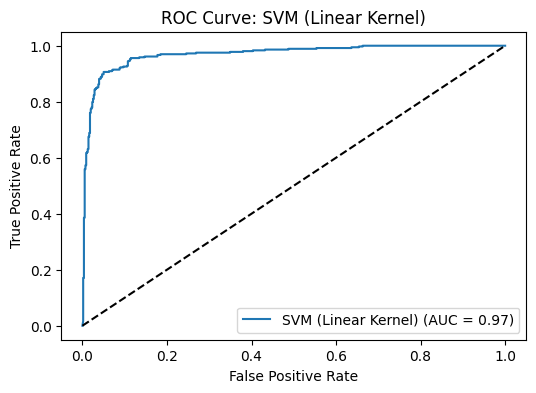

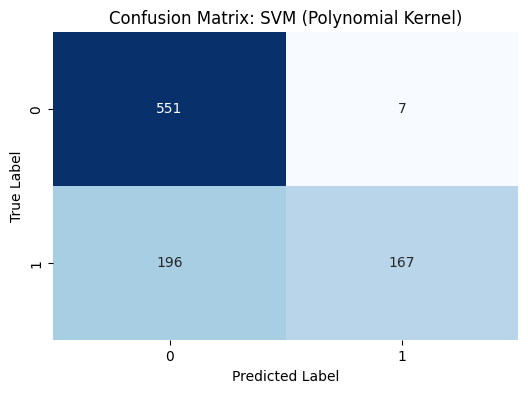

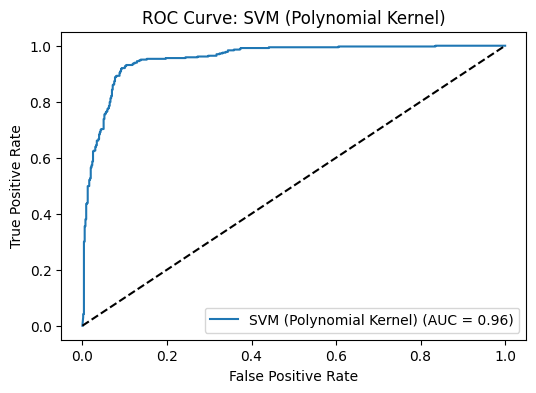

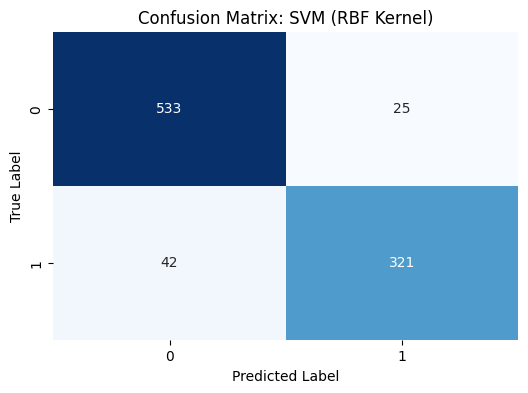

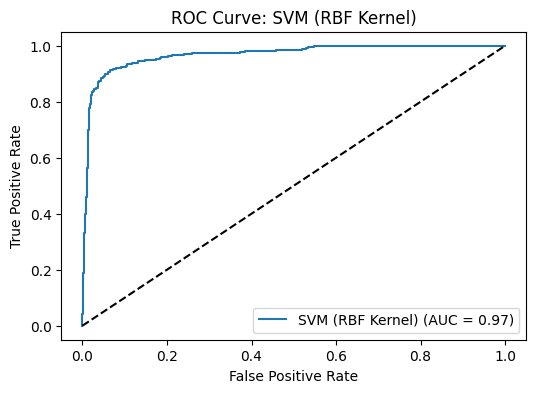

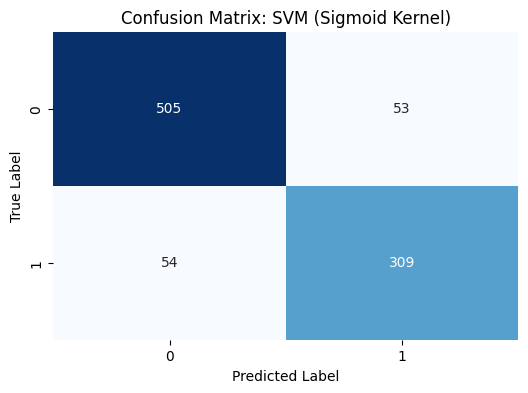

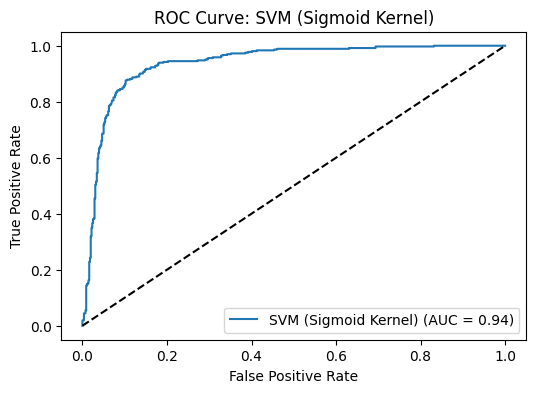

In [ ]:
# Confusion matrix and ROC curve for each SVM model
for name, model in svm_models.items():
    # Confusion matrix
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve: {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for each model
cv_results = []
for name, model in list(nb_models.items()) + list(knn_models.items()) + list(svm_models.items()):
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results.append([name] + list(cv_scores) + [cv_scores.mean(), cv_scores.std()])

# Display the cross-validation results
cv_results_df = pd.DataFrame(cv_results, columns=["Model", "Fold 1 Accuracy", "Fold 2 Accuracy", "Fold 3 Accuracy", "Fold 4 Accuracy", "Fold 5 Accuracy", "Mean Accuracy (CV=5)", "Std. Dev. (CV=5)"])
display(cv_results_df)

,Model,Fold 1 Accuracy,Fold 2 Accuracy,Fold 3 Accuracy,Fold 4 Accuracy,Fold 5 Accuracy,Mean Accuracy (CV=5),Std. Dev. (CV=5)
0,GaussianNB,0.851249,0.866304,0.854348,0.843478,0.695652,0.822206,0.063702
1,BernoulliNB,0.913138,0.911957,0.915217,0.930435,0.818478,0.897845,0.040239
2,"K-Nearest Neighbors (k=3, auto)",0.884908,0.901087,0.922826,0.921739,0.772826,0.880677,0.055730
3,"K-Nearest Neighbors (k=3, kd_tree)",0.884908,0.901087,0.922826,0.921739,0.772826,0.880677,0.055730
4,"K-Nearest Neighbors (k=3, ball_tree)",0.884908,0.901087,0.922826,0.921739,0.772826,0.880677,0.055730
5,"K-Nearest Neighbors (k=5, auto)",0.889251,0.902174,0.920652,0.918478,0.788043,0.883720,0.049188
6,"K-Nearest Neighbors (k=5, kd_tree)",0.889251,0.902174,0.920652,0.918478,0.788043,0.883720,0.049188
7,"K-Nearest Neighbors (k=5, ball_tree)",0.889251,0.902174,0.920652,0.918478,0.788043,0.883720,0.049188
8,"K-Nearest Neighbors (k=7, auto)",0.878393,0.900000,0.922826,0.911957,0.785870,0.879809,0.049231
9,"K-Nearest Neighbors (k=7, kd_tree)",0.878393,0.900000,0.922826,0.911957,0.785870,0.879809,0.049231


In [ ]:
# Transpose the DataFrame for better comparison
cv_results_transposed_df = cv_results_df.set_index("Model").transpose()

# Drop the 'Std. Dev. (CV=5)' row
cv_results_transposed_df = cv_results_transposed_df.drop('Std. Dev. (CV=5)')

display(cv_results_transposed_df)

Model,GaussianNB,BernoulliNB,"K-Nearest Neighbors (k=3, auto)","K-Nearest Neighbors (k=3, kd_tree)","K-Nearest Neighbors (k=3, ball_tree)","K-Nearest Neighbors (k=5, auto)","K-Nearest Neighbors (k=5, kd_tree)","K-Nearest Neighbors (k=5, ball_tree)","K-Nearest Neighbors (k=7, auto)","K-Nearest Neighbors (k=7, kd_tree)","K-Nearest Neighbors (k=7, ball_tree)",SVM (Linear Kernel),SVM (Polynomial Kernel),SVM (RBF Kernel),SVM (Sigmoid Kernel)
Fold 1 Accuracy,0.851249,0.913138,0.884908,0.884908,0.884908,0.889251,0.889251,0.889251,0.878393,0.878393,0.878393,0.918567,0.725299,0.932682,0.870793
Fold 2 Accuracy,0.866304,0.911957,0.901087,0.901087,0.901087,0.902174,0.902174,0.902174,0.900000,0.900000,0.900000,0.933696,0.781522,0.933696,0.894565
Fold 3 Accuracy,0.854348,0.915217,0.922826,0.922826,0.922826,0.920652,0.920652,0.920652,0.922826,0.922826,0.922826,0.900000,0.790217,0.950000,0.858696
Fold 4 Accuracy,0.843478,0.930435,0.921739,0.921739,0.921739,0.918478,0.918478,0.918478,0.911957,0.911957,0.911957,0.938043,0.786957,0.948913,0.900000
Fold 5 Accuracy,0.695652,0.818478,0.772826,0.772826,0.772826,0.788043,0.788043,0.788043,0.785870,0.785870,0.785870,0.830435,0.753261,0.850000,0.806522
Mean Accuracy (CV=5),0.822206,0.897845,0.880677,0.880677,0.880677,0.883720,0.883720,0.883720,0.879809,0.879809,0.879809,0.904148,0.767451,0.923058,0.866115


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint
from sklearn.pipeline import Pipeline

# Base pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(probability=True))
])

# Parameter spaces for each kernel
param_spaces = {
    "linear":  {"svm__kernel": ["linear"],  "svm__C": loguniform(1e-3, 1e3)},
    "poly":    {"svm__kernel": ["poly"],    "svm__C": loguniform(1e-3, 1e3),
                "svm__degree": randint(2, 6), "svm__gamma": loguniform(1e-4, 1e1)},
    "rbf":     {"svm__kernel": ["rbf"],     "svm__C": loguniform(1e-3, 1e3),
                "svm__gamma": loguniform(1e-4, 1e1)},
    "sigmoid": {"svm__kernel": ["sigmoid"], "svm__C": loguniform(1e-3, 1e3),
                "svm__gamma": loguniform(1e-4, 1e1)}
}

best_params = {}
for kernel, params in param_spaces.items():
    print(f"\n=== {kernel.upper()} Kernel ===")
    search = RandomizedSearchCV(
        pipeline, param_distributions=params,
        n_iter=10, cv=3, scoring='accuracy',
        n_jobs=-1, random_state=42
    )
    search.fit(X_train, y_train)
    best_params[kernel] = search.best_params_
    print("Best Params:", search.best_params_)
    print("Best CV Accuracy:", search.best_score_)

    # Validation
    y_pred = search.best_estimator_.predict(X_test) # Changed from X_val and y_val to X_test and y_test
    print("Validation Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

print("\nSummary of Best Parameters:", best_params)


=== LINEAR Kernel ===
Best Params: {'svm__C': np.float64(157.41890047456639), 'svm__kernel': 'linear'}
Best CV Accuracy: 0.9304315223937746
Validation Accuracy: 0.9272529858849077
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921


=== POLY Kernel ===
Best Params: {'svm__C': np.float64(0.10051981180656774), 'svm__degree': 5, 'svm__gamma': np.float64(0.3470266988650412), 'svm__kernel': 'poly'}
Best CV Accuracy: 0.9018962504426195
Validation Accuracy: 0.8935939196525515
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       558
           1       0.87      0.86      0.86       363

    accuracy                          

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(probability=True))
])

# Grid parameters
param_grid = [
    {"svm__kernel": ["linear"], "svm__C": np.logspace(-3, 3, 5)},
    {"svm__kernel": ["poly"], "svm__C": np.logspace(-3, 3, 5),
     "svm__degree": [2, 3, 4], "svm__gamma": ["scale", "auto"]},
    {"svm__kernel": ["rbf"], "svm__C": np.logspace(-3, 3, 5),
     "svm__gamma": ["scale", "auto"]},
    {"svm__kernel": ["sigmoid"], "svm__C": np.logspace(-3, 3, 5),
     "svm__gamma": ["scale", "auto"]}
]

# Grid search
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Validation
y_pred = grid.best_estimator_.predict(X_test)
print("Validation Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'svm__C': np.float64(1.0), 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best CV Accuracy: 0.9290740821989202
Validation Accuracy: 0.9272529858849077
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       558
           1       0.93      0.88      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921

